In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

In [2]:
df_pg = pd.read_excel('PG_complete_data.xlsx')
df_emr = pd.read_excel('EMR_complete_data.xlsx')

In [3]:
df_emr.head()

,ENCOUNTER_ID,ORGANIZATION_NAME,YEARS,MONTHS,DAYS,MED_RESOURCE_SERVICES,DESCRIPTION,PHYSICIAN_ATTENDING,PRSNL_GROUP_NAME,DEPARTMENT_NAME,SECTIONS,APPT_DT_TM,APPT_TYPE,SLOT_TYPE_DESC,MRN,BIRTH_DT_TM,AGE,GENDER,PATIENT_NATIONALITY,MARITAL_STATUS
0,80468944,KFSH & RC (Riyadh),2018,1,28,ONC-Radiation Oncology\r\n,Radiation Oncology FU,"Alomair, Ameen Saleh",ONC-Radiation Oncology,Oncology,Radiation Oncology,2018-01-28 10:30:00,Radiation Oncology New Follow-up,Report Slot Group,1,1958,60.0,Male,Saudi Arabia,Married
1,80572933,KFSH & RC (Riyadh),2018,1,1,ONC-Infusionl\r\n,Infusion Center Visit,"Infusion, Zone Five",ONC-Infusionl,Oncology,Infusionl,2018-01-01 09:00:00,Infusion Center Visit,Undefined,2,1994,23.0,Male,Saudi Arabia,Single
2,80595172,KFSH & RC (Riyadh),2018,1,1,ONC-Infusionl\r\n,Infusion Center Procedure Visit,"Infusion Procedure, Room 1",ONC-Infusionl,Oncology,Infusionl,2018-01-01 10:00:00,infusion Procedure Visit,Undefined,3,1978,39.0,Female,Saudi Arabia,Married
3,80596450,KFSH & RC (Riyadh),2018,1,1,ONC-Radiation Oncology,T6 (Tomotherapy) FU,"T6, TOMOTHERAPY",ONC-Radiation Oncology,Oncology,Radiation Oncology,2018-01-01 08:50:00,T6 (TOMOTHERAPY) Follow-up,Follow-up Slots Group,4,1973,44.0,Male,Saudi Arabia,Married
4,80596453,KFSH & RC (Riyadh),2018,1,1,ONC-Radiation Oncology\r\n,Radiation Oncology FU,"Alrajhi, Nasser Mohamed",ONC-Radiation Oncology,Oncology,Radiation Oncology,2018-01-01 14:45:00,Radiation Oncology New Follow-up,Report Slot Group,4,1973,44.0,Male,Saudi Arabia,Married


In [4]:
df_pg.head()

,HOS,BGUNCODL,DISMM,DISDD,DISYR,OCCUR,CSURVEY,A1,A2,REG1,...,I6,I47,I17,I13,O1,O2,O3,RACE,SEX,AGE
0,15611,1237,9,8,2019,2.0,1.0,5.0,4.0,5.0,...,5.0,4.0,5.0,4.0,4.0,4.0,5.0,16.0,2,45.0
1,15611,1234,11,19,2018,1.0,1.0,3.0,4.0,5.0,...,5.0,4.0,3.0,4.0,5.0,4.0,5.0,16.0,1,53.0
2,15611,1237,9,24,2019,1.0,1.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,16.0,2,35.0
3,15611,1237,11,19,2018,2.0,1.0,3.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,16.0,1,73.0
4,15611,1234,11,11,2019,1.0,1.0,5.0,5.0,4.0,...,5.0,5.0,5.0,4.0,5.0,5.0,5.0,16.0,1,41.0


### EDA

#### EDA:  PG data 

In [5]:
df_pg.shape

(5078, 44)

In [6]:
df_pg.columns

Index(['HOS', 'BGUNCODL', 'DISMM', 'DISDD', 'DISYR', 'OCCUR', 'CSURVEY', 'A1',
       'A2', 'REG1', 'REG2', 'FAC1', 'FAC2', 'FAC3', 'FAC4', 'MED39', 'MED37',
       'MED27', 'RT1', 'RT2', 'RT3', 'RT4', 'RT5', 'CT1', 'CT2', 'CT3', 'CT4',
       'CT5', 'CT6', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I47', 'I17', 'I13',
       'O1', 'O2', 'O3', 'RACE', 'SEX', 'AGE'],
      dtype='object')

In [7]:
#survey questions 
df_pg.iloc[:, 7:-3].columns

Index(['A1', 'A2', 'REG1', 'REG2', 'FAC1', 'FAC2', 'FAC3', 'FAC4', 'MED39',
       'MED37', 'MED27', 'RT1', 'RT2', 'RT3', 'RT4', 'RT5', 'CT1', 'CT2',
       'CT3', 'CT4', 'CT5', 'CT6', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I47',
       'I17', 'I13', 'O1', 'O2', 'O3'],
      dtype='object')

In [8]:
#Not answered surveys
not_answered = len(df_pg[df_pg.iloc[:, 7:-3].isna().all(axis=1)])
print('Total unnswered surveys {} or {}%'.format(not_answered, np.round(not_answered/df_pg.shape[0]*100,2)))

Total unnswered surveys 2078 or 40.92%


In [9]:
#find Null values in the entire dataframe
print(df_pg.isnull().sum().sum())

101967


In [10]:
pg_missing_data = df_pg.isnull().sum()
#get the percentage
pg_missing_data = pg_missing_data[pg_missing_data > 0]/(df_pg.shape[0]) * 100
# #sort the values
pg_missing_data.sort_values()
# inplace=True

AGE         0.019693
RACE        0.039386
CSURVEY    40.035447
FAC3       43.442300
FAC2       43.698306
MED37      44.151241
FAC1       44.426940
OCCUR      44.525404
MED39      44.604175
REG2       44.722332
MED27      45.234344
REG1       45.785742
A1         46.002363
A2         46.494683
FAC4       47.380859
I17        48.267034
I6         48.680583
O2         48.956282
I4         49.291059
I1         49.409216
O3         49.409216
I5         49.468295
I3         49.665223
I13        49.881843
I47        50.137850
I2         50.334777
O1         50.807404
CT6        74.241827
CT4        75.147696
CT3        75.167389
CT1        75.206774
CT5        75.265853
CT2        75.364317
RT2        76.191414
RT5        76.467113
RT3        76.604963
RT4        76.742812
RT1        76.742812
dtype: float64

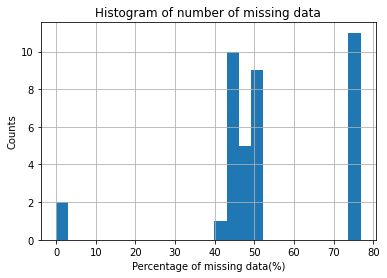

In [11]:
plt.hist(pg_missing_data, bins = 25)

plt.xlabel('Percentage of missing data(%)')
plt.ylabel('Counts')
plt.title('Histogram of number of missing data')
plt.grid(True)
plt.show()

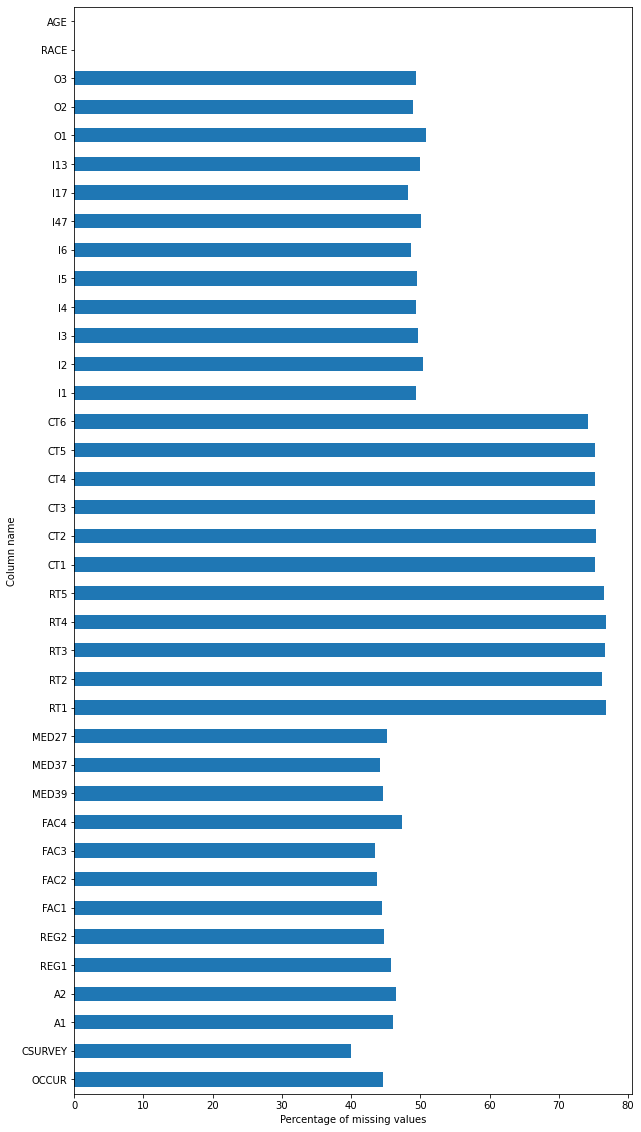

In [12]:
pg_missing_data.plot.barh(figsize=(10,20));
plt.ylabel('Column name')
plt.xlabel('Percentage of missing values')
plt.show()

In [13]:
df_pg['SEX'].value_counts()

2    2643
1    2435
Name: SEX, dtype: int64

<AxesSubplot:xlabel='SEX'>

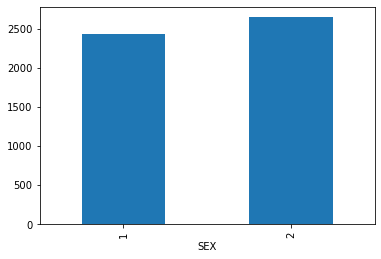

In [14]:
df_pg.groupby(['SEX']).size().plot(kind = "bar") 

In [15]:
df_pg['RACE'].value_counts()

16.0    4970
18.0      62
9.0       36
19.0       8
Name: RACE, dtype: int64

In [16]:
df_pg['OCCUR'].value_counts()

1.0    2195
2.0     622
Name: OCCUR, dtype: int64

<AxesSubplot:xlabel='SEX', ylabel='count'>

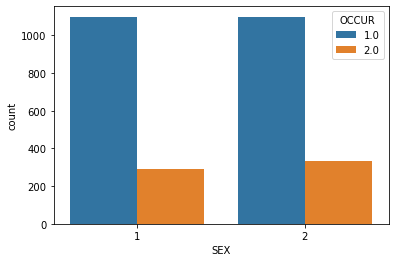

In [17]:
sns.countplot(x='SEX', hue='OCCUR', data = df_pg)

<AxesSubplot:xlabel='BGUNCODL'>

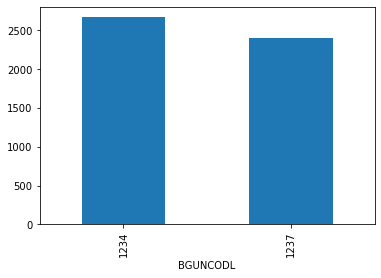

In [18]:
df_pg.groupby(['BGUNCODL']).size().plot(kind = "bar") 

#### EDA:  EMR data 

In [19]:
df_emr.shape

(179066, 20)

In [20]:
df_emr.MRN.nunique()

10097

In [21]:
df_emr.isna().sum()

ENCOUNTER_ID                0
ORGANIZATION_NAME           0
YEARS                       0
MONTHS                      0
DAYS                        0
MED_RESOURCE_SERVICES       0
DESCRIPTION              2243
PHYSICIAN_ATTENDING         0
PRSNL_GROUP_NAME            0
DEPARTMENT_NAME             0
SECTIONS                    0
APPT_DT_TM                  0
APPT_TYPE                   0
SLOT_TYPE_DESC              0
MRN                         0
BIRTH_DT_TM                 0
AGE                         4
GENDER                      0
PATIENT_NATIONALITY         0
MARITAL_STATUS              0
dtype: int64

In [22]:
df_emr.PATIENT_NATIONALITY.value_counts()

Saudi Arabia            174229
Desert Wonder             1242
Yemen                      928
Kuwait                     317
Bahrain                    307
Syrian Arab Republic       295
Philippines                239
Morocco                    236
Egypt                      150
Pakistan                   129
Sudan                      110
Jordan                      98
India                       83
Bangladesh                  81
USA                         81
United Kingdom              65
China                       58
Malaysia                    51
Cameron                     50
Eritrea                     49
Palestine                   42
United Arab Emirates        41
France                      37
Nigeria                     35
Canada                      32
Lebanon                     21
Unknown                     12
Tunisia                     11
Indonesia                    8
Mauritania                   7
Singapore                    6
Somalia                      4
Undefine

<AxesSubplot:xlabel='SECTIONS'>

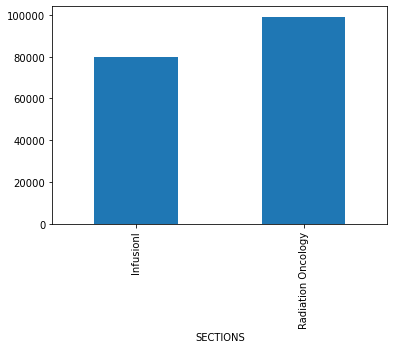

In [23]:
df_emr.groupby(['SECTIONS']).size().plot(kind='bar')

In [24]:
df_emr.GENDER.value_counts()

Female       98005
Male         81057
Undefined        4
Name: GENDER, dtype: int64

<AxesSubplot:xlabel='GENDER'>

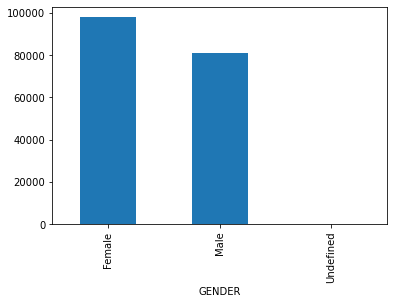

In [25]:
df_emr.groupby(['GENDER']).size().plot(kind='bar')

### Step 1: Preprocessing

#### Step 1.1 PG 

In [26]:
# Drop unanswered survys
df_pg_clean = df_pg[~df_pg.iloc[:, 7:-3].isna().all(axis=1)] 
df_pg_clean.shape

(3000, 44)

In [27]:
df_pg_clean.index

Int64Index([   0,    1,    2,    3,    4,    6,    8,   11,   12,   13,
            ...
            5054, 5056, 5062, 5064, 5066, 5069, 5071, 5074, 5076, 5077],
           dtype='int64', length=3000)

In [28]:
df_pg_clean.reset_index(inplace = True)

#### RT & CT Score Analysis

In [29]:
#How many Nulls in each column?
df_pg_clean.loc[:,['RT1', 'RT2', 'RT3', 'RT4', 'RT5', 'CT1',
       'CT2', 'CT3', 'CT4', 'CT5', 'CT6']].isna().sum()

RT1    1819
RT2    1791
RT3    1812
RT4    1819
RT5    1805
CT1    1741
CT2    1749
CT3    1739
CT4    1738
CT5    1744
CT6    1692
dtype: int64

In [30]:
#Fill all Nulls with 0s
df_pg_clean.loc[:,['RT1', 'RT2', 'RT3', 'RT4', 'RT5', 'CT1',
       'CT2', 'CT3', 'CT4', 'CT5', 'CT6']] = df_pg_clean.loc[:,['RT1', 'RT2', 'RT3', 'RT4', 'RT5', 'CT1',
       'CT2', 'CT3', 'CT4', 'CT5', 'CT6']].fillna(0)

C:\Users\n3534900\Anaconda3\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [31]:
#Create new SCORE column 
df_pg_clean['SCORE'] = np.nan

C:\Users\n3534900\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
# for each question consider 1 and 2 as negative 3,4 and 5 as positive
#Encoding positive : 1, negative: -1
for i, value in enumerate(df_pg_clean.BGUNCODL):
    if(value == 1237):
        RT1, RT2, RT3, RT4, RT5 = df_pg_clean.loc[i,['RT1', 'RT2', 'RT3', 'RT4', 'RT5']]
        RT_total = (RT1+ RT2+ RT3+ RT4+ RT5)
        if RT_total != 0:
            RT_score = (RT_total/5)
            if RT_score >=3:
                df_pg_clean['SCORE'][i] = 1
            else: 
                df_pg_clean['SCORE'][i] = 0
        else:
            df_pg_clean['SCORE'][i] = np.nan
    else: 
        CT1, CT2, CT3, CT4, CT5, CT6 = df_pg_clean.loc[i,['CT1', 'CT2', 'CT3', 'CT4','CT5', 'CT6']]
        CT_total = (CT1+ CT2+ CT3+ CT4+ CT5+ CT6)
        if CT_total !=0:
            CT_score = (CT_total/6)
            if CT_score >=3:
                df_pg_clean['SCORE'][i] = 1
            else: 
                df_pg_clean['SCORE'][i] = 0
        else:
            df_pg_clean['SCORE'][i] = np.nan

C:\Users\n3534900\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\n3534900\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\n3534900\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

<AxesSubplot:xlabel='SCORE'>

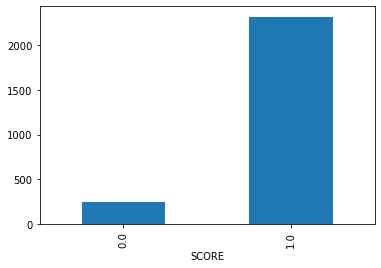

In [33]:
df_pg_clean.groupby(['SCORE']).size().plot(kind = "bar") 

In [34]:
df_pg_clean['SCORE'].isna().sum()

440

In [35]:
df_pg_clean['SCORE'].value_counts()

1.0    2319
0.0     241
Name: SCORE, dtype: int64

#### Overall Score Analysis

In [36]:
df_pg_clean['O_SCORE'] = np.nan

C:\Users\n3534900\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_pg_clean.loc[:,['O1', 'O2', 'O3']].isna().sum()

O1    502
O2    408
O3    431
dtype: int64

In [38]:
# fill all null values with 0s 
df_pg_clean.loc[:,['O1', 'O2', 'O3']] = df_pg_clean.loc[:,['O1', 'O2', 'O3']].fillna(0)

In [39]:
df_pg_clean.loc[:,['O1', 'O2', 'O3']].isna().sum().sum()

0

In [40]:
for i, value in df_pg_clean.iterrows():
    O1, O2, O3 = df_pg_clean.loc[i,['O1', 'O2', 'O3']]
    total = O1+ O2+ O3
    if total != 0:
        score = total/3
        if score >=3:
            df_pg_clean['O_SCORE'][i] = 1
        else:
            df_pg_clean['O_SCORE'][i] = 0
    else:
        df_pg_clean['O_SCORE'][i] = np.nan


C:\Users\n3534900\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\n3534900\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\n3534900\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_

<AxesSubplot:xlabel='O_SCORE'>

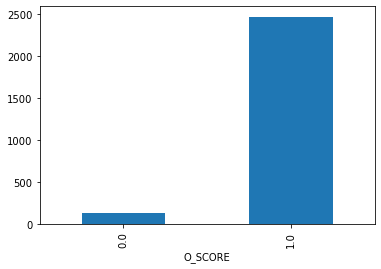

In [41]:
df_pg_clean.groupby(['O_SCORE']).size().plot(kind = "bar") 

In [42]:
df_pg_clean['O_SCORE'].isna().sum()

398

In [43]:
df_pg_clean['O_SCORE'].value_counts()

1.0    2471
0.0     131
Name: O_SCORE, dtype: int64

#### Overall Score 3 Options

In [44]:
df_pg_clean['O_SCORE_3'] = np.nan

C:\Users\n3534900\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
#Encoding 1: +ve, 0: -ve, 3: neutral
for i, value in df_pg_clean.iterrows():
    O1, O2, O3 = df_pg_clean.loc[i,['O1', 'O2', 'O3']]
    total = O1+ O2+ O3
    if total != 0:
        score = total/3
        if score >3:
            df_pg_clean['O_SCORE_3'][i] = 1
        elif score == 3:
            df_pg_clean['O_SCORE_3'][i] = 3
        else:
            df_pg_clean['O_SCORE_3'][i] = 0
    else:
        df_pg_clean['O_SCORE_3'][i] = np.nan

C:\Users\n3534900\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\n3534900\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\n3534900\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\n3534900\Anaconda3\lib\site-packages\ipykernel_launch

<AxesSubplot:xlabel='O_SCORE_3'>

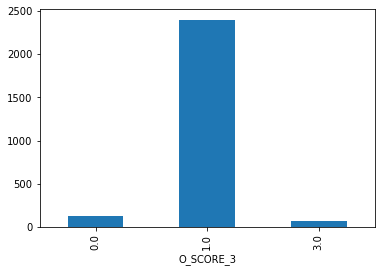

In [46]:
df_pg_clean.groupby(['O_SCORE_3']).size().plot(kind = "bar") 

In [47]:
df_pg_clean['O_SCORE_3'].value_counts()

1.0    2398
0.0     131
3.0      73
Name: O_SCORE_3, dtype: int64

In [48]:
df_pg_clean.O_SCORE_3.isna().sum()

398

In [49]:
df_pg_clean

,index,HOS,BGUNCODL,DISMM,DISDD,DISYR,OCCUR,CSURVEY,A1,A2,...,I13,O1,O2,O3,RACE,SEX,AGE,SCORE,O_SCORE,O_SCORE_3
0,0,15611,1237,9,8,2019,2.0,1.0,5.0,4.0,...,4.0,4.0,4.0,5.0,16.0,2,45.0,1.0,1.0,1.0
1,1,15611,1234,11,19,2018,1.0,1.0,3.0,4.0,...,4.0,5.0,4.0,5.0,16.0,1,53.0,1.0,1.0,1.0
2,2,15611,1237,9,24,2019,1.0,1.0,5.0,5.0,...,5.0,5.0,5.0,5.0,16.0,2,35.0,1.0,1.0,1.0
3,3,15611,1237,11,19,2018,2.0,1.0,3.0,3.0,...,NaN,0.0,4.0,0.0,16.0,1,73.0,NaN,0.0,0.0
4,4,15611,1234,11,11,2019,1.0,1.0,5.0,5.0,...,4.0,5.0,5.0,5.0,16.0,1,41.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,5069,15611,1237,4,4,2018,2.0,1.0,5.0,5.0,...,5.0,5.0,5.0,5.0,16.0,2,53.0,1.0,1.0,1.0
2996,5071,15611,1237,12,10,2018,1.0,1.0,5.0,5.0,...,5.0,5.0,5.0,5.0,16.0,2,19.0,1.0,1.0,1.0
2997,5074,15611,1237,8,25,2019,2.0,2.0,4.0,NaN,...,NaN,0.0,0.0,0.0,16.0,2,38.0,NaN,NaN,NaN
2998,5076,15611,1237,12,18,2018,1.0,1.0,5.0,5.0,...,5.0,5.0,5.0,5.0,16.0,2,53.0,1.0,1.0,1.0
